In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# import csv
df = pd.read_csv('data.csv')
df.head()

NameError: name 'pd' is not defined

In [285]:
df[df.duplicated].shape

(26, 24)

In [286]:
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [287]:
df.describe().transpose()

count        mean         std    min    25%    50%  \
age               991320.0   47.614529   14.181346   20.0   35.0   45.0   
height            991320.0  162.240563    9.282922  130.0  155.0  160.0   
weight            991320.0   63.283884   12.514101   25.0   55.0   60.0   
waistline         991320.0   81.233255   11.850296    8.0   74.1   81.0   
sight_left        991320.0    0.980833    0.605954    0.1    0.7    1.0   
sight_right       991320.0    0.978428    0.604779    0.1    0.7    1.0   
hear_left         991320.0    1.031495    0.174652    1.0    1.0    1.0   
hear_right        991320.0    1.030476    0.171892    1.0    1.0    1.0   
SBP               991320.0  122.432360   14.543083   67.0  112.0  120.0   
DBP               991320.0   76.052549    9.889334   32.0   70.0   76.0   
BLDS              991320.0  100.424305   24.179852   25.0   88.0   96.0   
tot_chole         991320.0  195.556769   38.660092   30.0  169.0  193.0   
HDL_chole         991320.0   56.936984   17.238578    1.0   46.0   55.0   
LDL_chole         991320.0  113.037429   35.842938    1.0   89.0  111.0   
triglyceride      991320.0  132.140030  102.194762    1.0   73.0  106.0   
hemoglobin        991320.0   14.229810    1.584924    1.0   13.2   14.3   
urine_protein     991320.0    1.094221    0.437719    1.0    1.0    1.0   
serum_creatinine  991320.0    0.860467    0.480536    0.1    0.7    0.8   
SGOT_AST          991320.0   25.989424   23.493668    1.0   19.0   23.0   
SGOT_ALT          991320.0   25.755148   26.308910    1.0   15.0   20.0   
gamma_GTP         991320.0   37.136152   50.423811    1.0   16.0   23.0   
SMK_stat_type_cd  991320.0    1.608112    0.818504    1.0    1.0    1.0   

                    75%     max  
age                60.0    85.0  
height            170.0   190.0  
weight             70.0   140.0  
waistline          87.8   999.0  
sight_left          1.2     9.9  
sight_right         1.2     9.9  
hear_left           1.0     2.0  
hear_right          1.0     2.0  
SBP               131.0   273.0  
DBP                82.0   185.0  
BLDS              105.0   852.0  
tot_chole         219.0  2344.0  
HDL_chole          66.0  8110.0  
LDL_chole         135.0  5119.0  
triglyceride      159.0  9490.0  
hemoglobin         15.4    25.0  
urine_protein       1.0     6.0  
serum_creatinine    1.0    98.0  
SGOT_AST           28.0  9999.0  
SGOT_ALT           29.0  7210.0  
gamma_GTP          39.0   999.0  
SMK_stat_type_cd    2.0     3.0

In [288]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 991320 rows and 24 columns


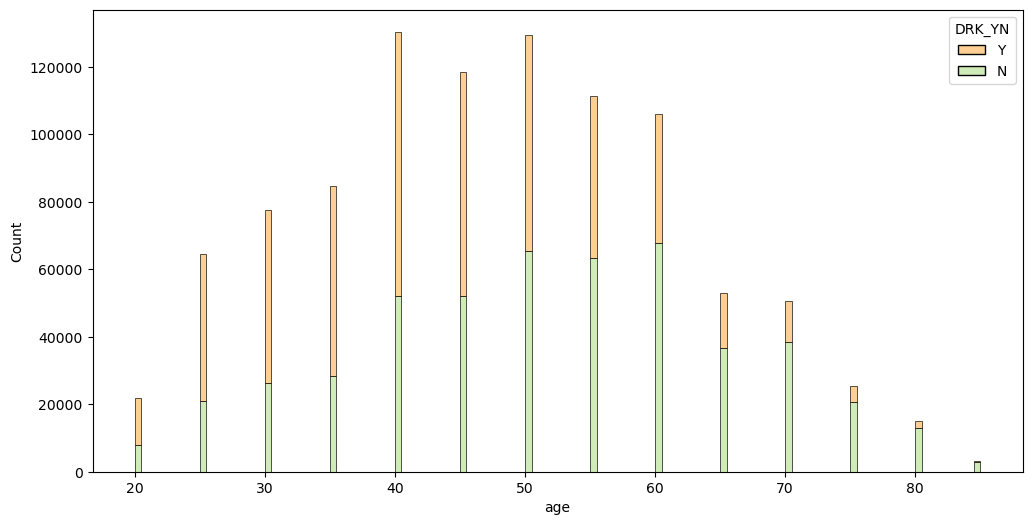

In [289]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.show()

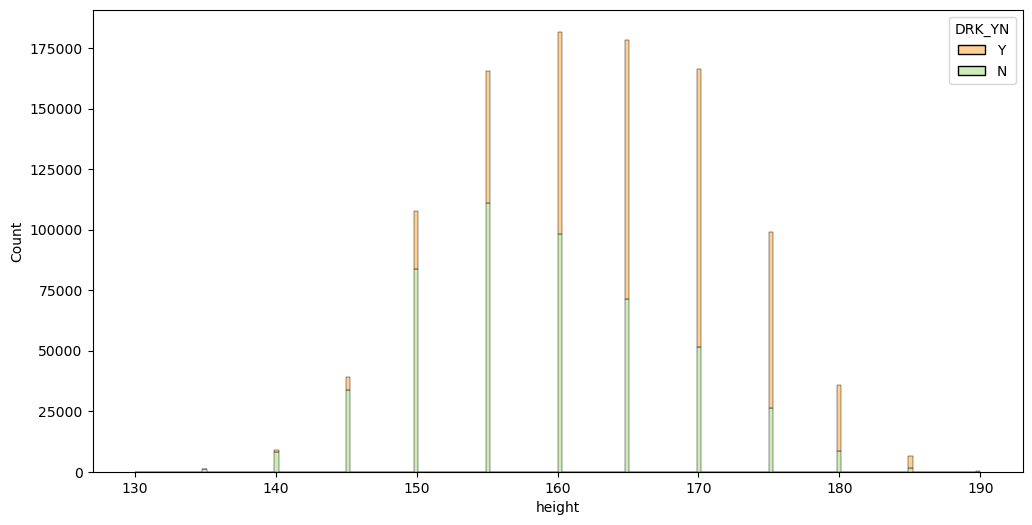

In [290]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='height',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.show()

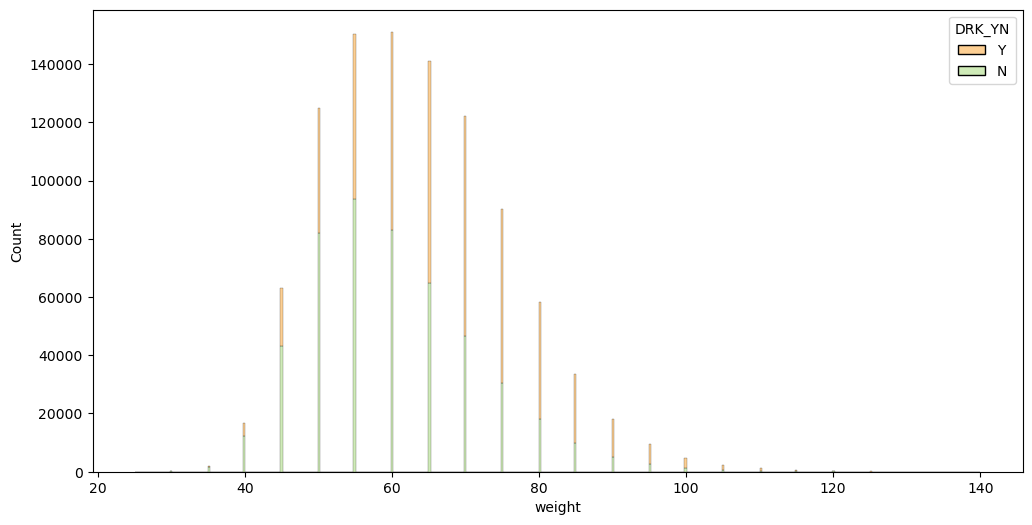

In [291]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='weight',palette='Spectral',hue='DRK_YN',multiple='stack')
plt.show()

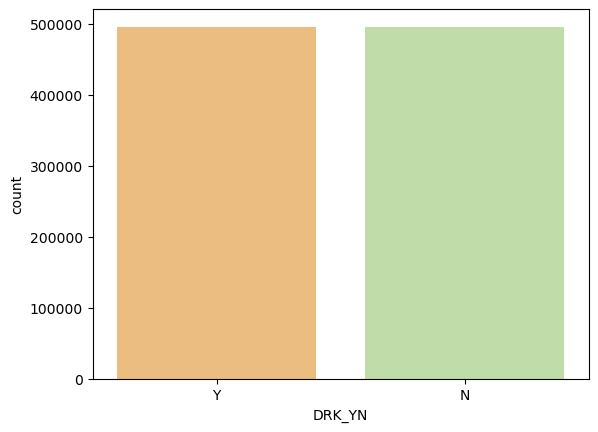

In [292]:
sns.countplot(x=df.DRK_YN,palette='Spectral')
plt.show()

In [293]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns 
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2  # Определение количества строк в сетке подграфиков

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))  

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

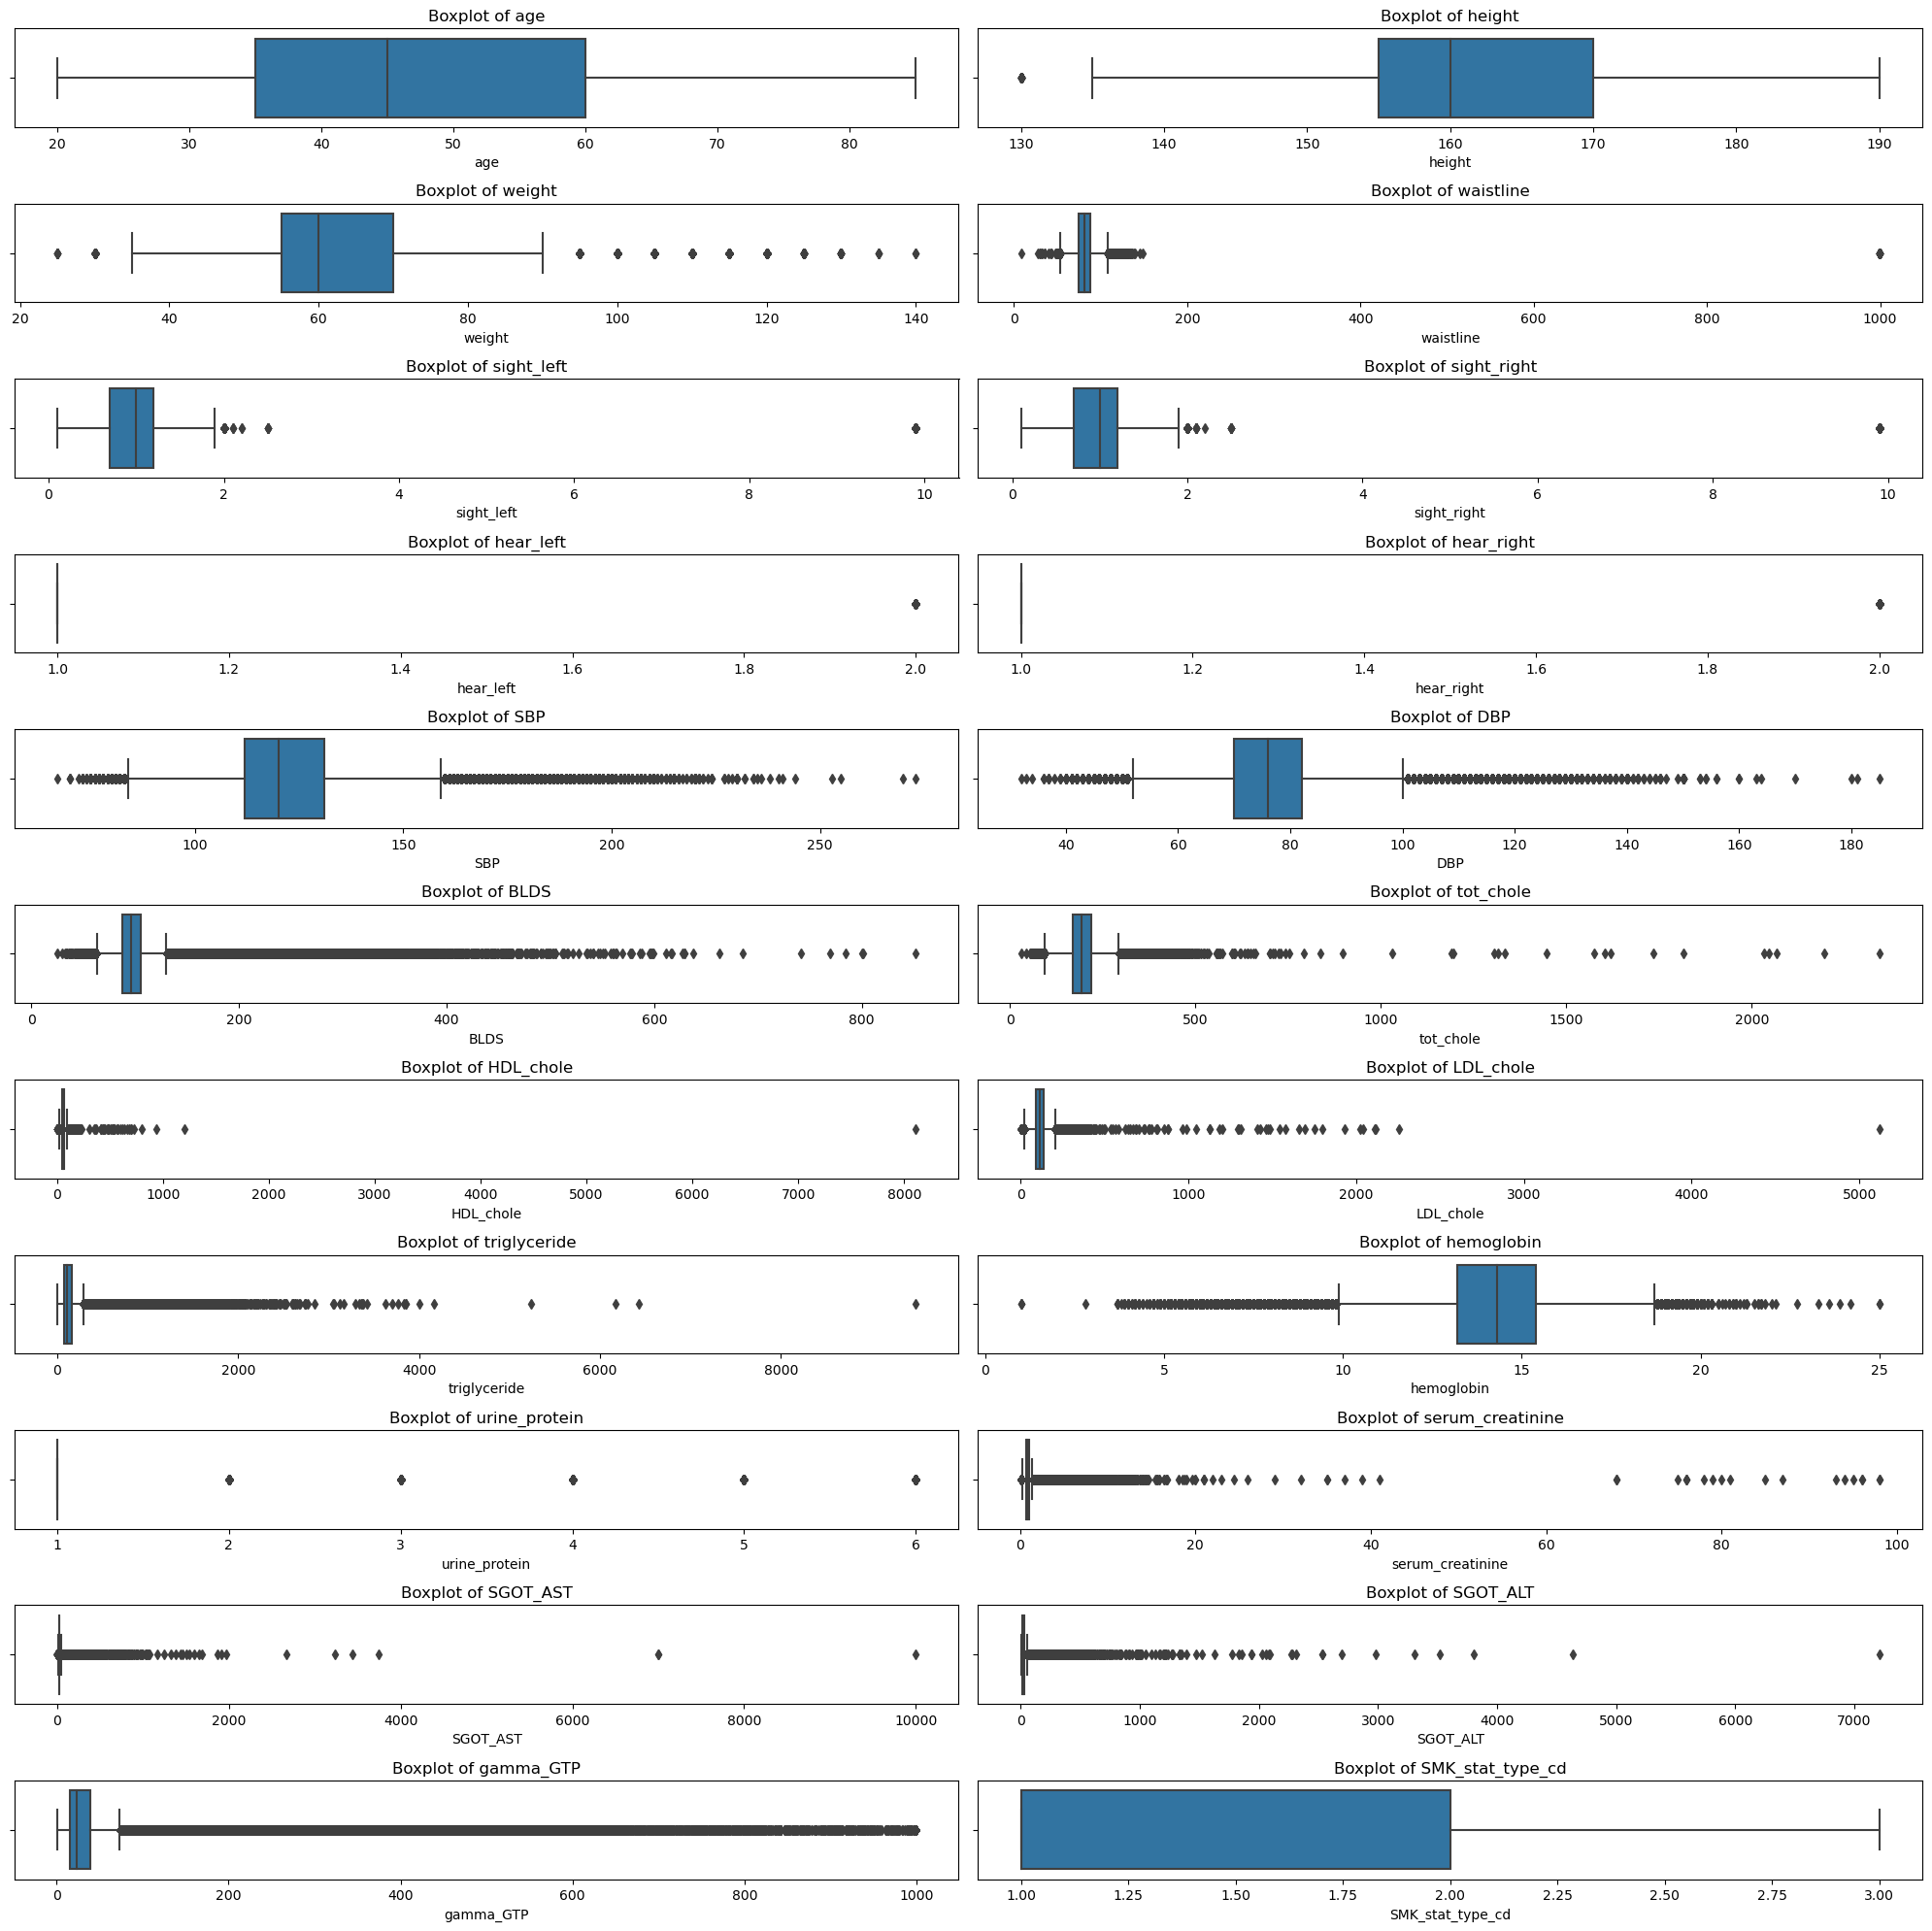

In [294]:
plot_boxplots(df)

# Cleaning the data

In [295]:
df1 = df.copy()
df1

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       Y  
1            27.0               3.0       N  
2            68.0               1.0       N  
3            18.0               1.0       N  
4            25.0               1.0       N  
...           ...               ...     ...  
991341       27.0               1.0       N  
991342       15.0               1.0       N  
991343       17.0               3.0       Y  
991344       17.0               1.0       N  
991345       36.0               3.0       Y  

[991320 rows x 24 columns]

In [296]:
df1['sex'] = df1['sex'].replace({'Male': 0, 'Female': 1})
df1['DRK_YN'] = df1['DRK_YN'].replace({'N': 0, 'Y': 1})
df1

sex  age  height  weight  waistline  sight_left  sight_right  \
0         0   35     170      75       90.0         1.0          1.0   
1         0   30     180      80       89.0         0.9          1.2   
2         0   40     165      75       91.0         1.2          1.5   
3         0   50     175      80       91.0         1.5          1.2   
4         0   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    0   45     175      80       92.1         1.5          1.5   
991342    0   35     170      75       86.0         1.0          1.5   
991343    1   40     155      50       68.0         1.0          0.7   
991344    0   25     175      60       72.0         1.5          1.0   
991345    0   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[991320 rows x 24 columns]

In [301]:
df2 = df1[df1['waistline'] != 999]
df2 = df2[df2['sight_right'] != 9.9]
df2 = df2[df2['sight_left'] != 9.9]
df2 = df2[df2['HDL_chole'] < 2000]
df2 = df2[df2['triglyceride'] < 5000]
df2 = df2[df2['serum_creatinine'] < 50]
df2 = df2[df2['SGOT_AST'] < 1150]
df2 = df2[df2['SGOT_ALT'] < 1150]
df2

sex  age  height  weight  waistline  sight_left  sight_right  \
0         0   35     170      75       90.0         1.0          1.0   
1         0   30     180      80       89.0         0.9          1.2   
2         0   40     165      75       91.0         1.2          1.5   
3         0   50     175      80       91.0         1.5          1.2   
4         0   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    0   45     175      80       92.1         1.5          1.5   
991342    0   35     170      75       86.0         1.0          1.5   
991343    1   40     155      50       68.0         1.0          0.7   
991344    0   25     175      60       72.0         1.5          1.0   
991345    0   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[985446 rows x 24 columns]

In [303]:
def remove_outliers(df, columns, k=1.5):
    for column in columns:
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        iqr = q3 - q1

        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [310]:
remove_outliers(df2,['waistline','SBP', 'DBP','BLDS','tot_chole', 'HDL_chole', 'LDL_chole','triglyceride','hemoglobin','serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP'],k=1.5)

sex  age  height  weight  waistline  sight_left  sight_right  \
0         0   35     170      75       90.0         1.0          1.0   
1         0   30     180      80       89.0         0.9          1.2   
2         0   40     165      75       91.0         1.2          1.5   
3         0   50     175      80       91.0         1.5          1.2   
4         0   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    0   45     175      80       92.1         1.5          1.5   
991342    0   35     170      75       86.0         1.0          1.5   
991343    1   40     155      50       68.0         1.0          0.7   
991344    0   25     175      60       72.0         1.5          1.0   
991345    0   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      41.5      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[985446 rows x 24 columns]

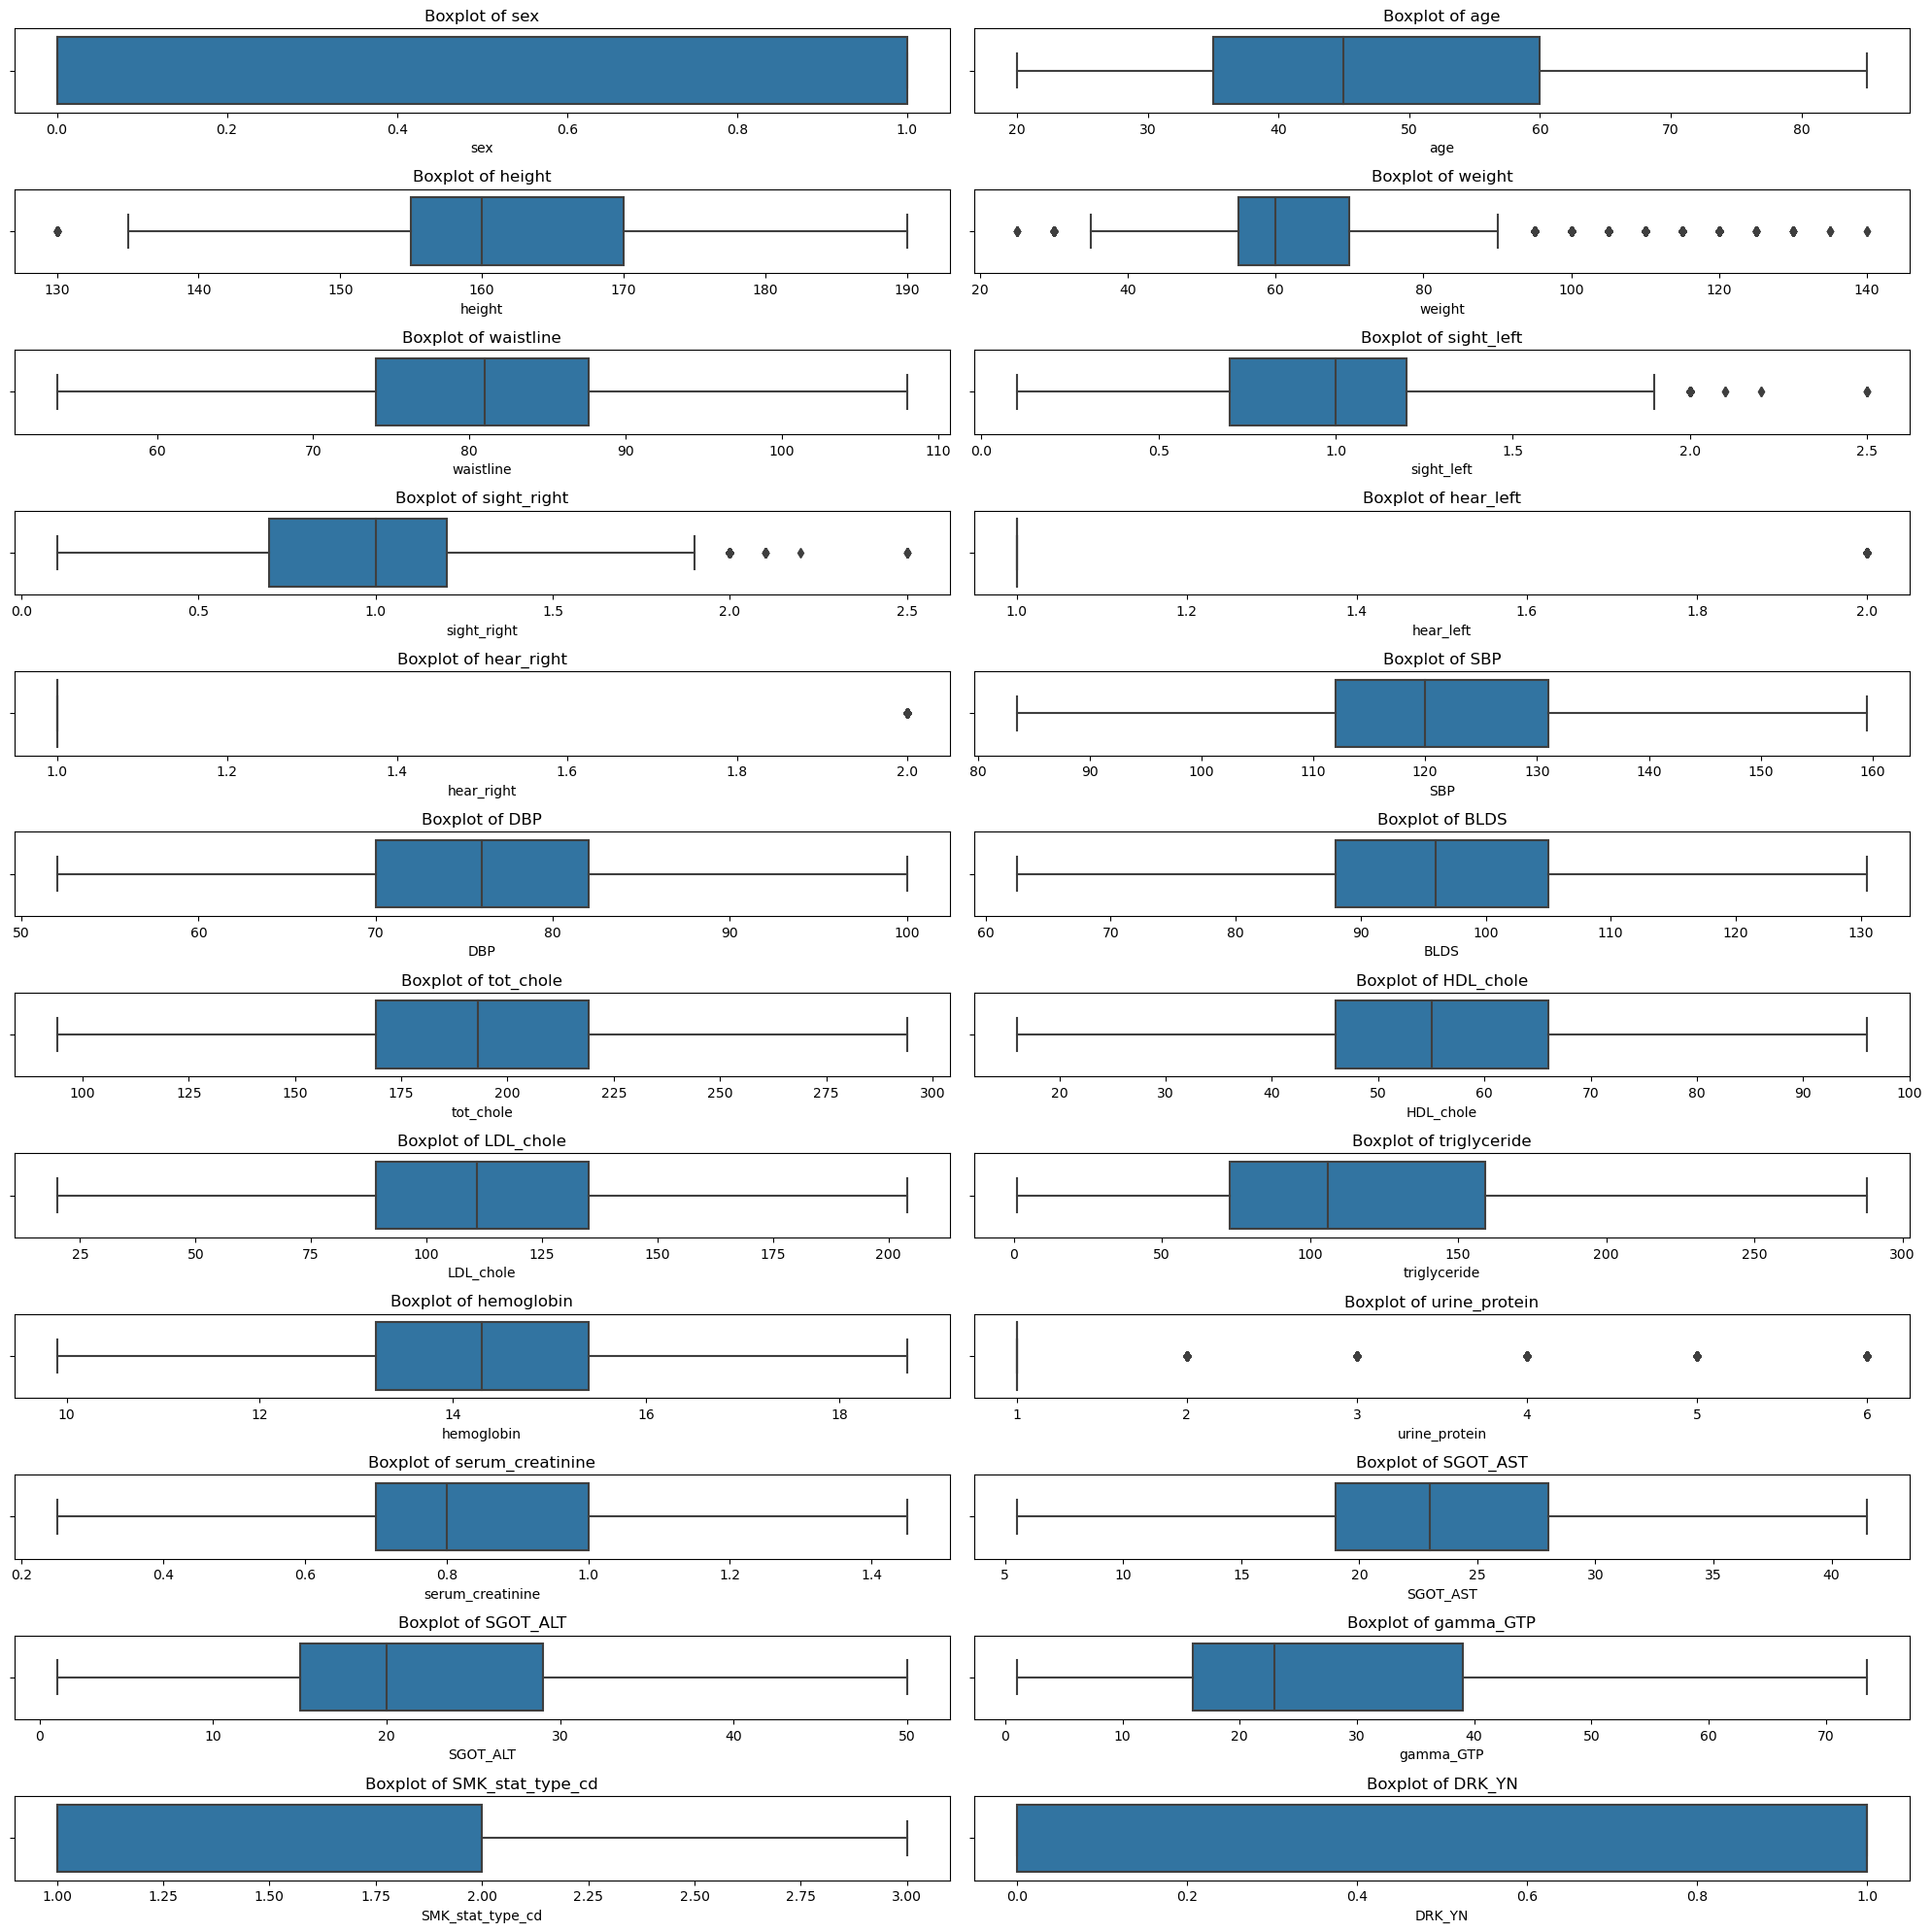

In [311]:
plot_boxplots(df2)

In [312]:
df3 = df2.drop(['sex', 'SMK_stat_type_cd', 'DRK_YN'], axis=1)
df3

age  height  weight  waistline  sight_left  sight_right  hear_left  \
0        35     170      75       90.0         1.0          1.0        1.0   
1        30     180      80       89.0         0.9          1.2        1.0   
2        40     165      75       91.0         1.2          1.5        1.0   
3        50     175      80       91.0         1.5          1.2        1.0   
4        50     165      60       80.0         1.0          1.2        1.0   
...     ...     ...     ...        ...         ...          ...        ...   
991341   45     175      80       92.1         1.5          1.5        1.0   
991342   35     170      75       86.0         1.0          1.5        1.0   
991343   40     155      50       68.0         1.0          0.7        1.0   
991344   25     175      60       72.0         1.5          1.0        1.0   
991345   50     160      70       90.5         1.0          1.5        1.0   

        hear_right    SBP   DBP  ...  tot_chole  HDL_chole  LDL_chole  \
0              1.0  120.0  80.0  ...      193.0       48.0      126.0   
1              1.0  130.0  82.0  ...      228.0       55.0      148.0   
2              1.0  120.0  70.0  ...      136.0       41.0       74.0   
3              1.0  145.0  87.0  ...      201.0       76.0      104.0   
4              1.0  138.0  82.0  ...      199.0       61.0      117.0   
...            ...    ...   ...  ...        ...        ...        ...   
991341         1.0  114.0  80.0  ...      198.0       46.0      125.0   
991342         1.0  119.0  83.0  ...      133.0       40.0       84.0   
991343         1.0  110.0  70.0  ...      205.0       96.0       77.0   
991344         1.0  119.0  74.0  ...      122.0       38.0       73.0   
991345         1.0  133.0  79.0  ...      225.0       39.0      153.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
2              104.0        15.8            1.0               0.9      41.5   
3              106.0        17.6            1.0               1.1      29.0   
4              104.0        13.8            1.0               0.8      19.0   
...              ...         ...            ...               ...       ...   
991341         132.0        15.0            1.0               1.0      26.0   
991342          45.0        15.8            1.0               1.1      14.0   
991343         157.0        14.3            1.0               0.8      30.0   
991344          53.0        14.5            1.0               0.8      21.0   
991345         163.0        15.8            1.0               0.9      24.0   

        SGOT_ALT  gamma_GTP  
0           35.0       40.0  
1           36.0       27.0  
2           32.0       68.0  
3           34.0       18.0  
4           12.0       25.0  
...          ...        ...  
991341      36.0       27.0  
991342      17.0       15.0  
991343      27.0       17.0  
991344      14.0       17.0  
991345      43.0       36.0  

[985446 rows x 21 columns]

In [313]:
# remove hear_left, hear_right, and urine_protein
df4 = df3.drop(['hear_left', 'hear_right', 'urine_protein'], axis=1)
df4

age  height  weight  waistline  sight_left  sight_right    SBP   DBP  \
0        35     170      75       90.0         1.0          1.0  120.0  80.0   
1        30     180      80       89.0         0.9          1.2  130.0  82.0   
2        40     165      75       91.0         1.2          1.5  120.0  70.0   
3        50     175      80       91.0         1.5          1.2  145.0  87.0   
4        50     165      60       80.0         1.0          1.2  138.0  82.0   
...     ...     ...     ...        ...         ...          ...    ...   ...   
991341   45     175      80       92.1         1.5          1.5  114.0  80.0   
991342   35     170      75       86.0         1.0          1.5  119.0  83.0   
991343   40     155      50       68.0         1.0          0.7  110.0  70.0   
991344   25     175      60       72.0         1.5          1.0  119.0  74.0   
991345   50     160      70       90.5         1.0          1.5  133.0  79.0   

         BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0        99.0      193.0       48.0      126.0          92.0        17.1   
1       106.0      228.0       55.0      148.0         121.0        15.8   
2        98.0      136.0       41.0       74.0         104.0        15.8   
3        95.0      201.0       76.0      104.0         106.0        17.6   
4       101.0      199.0       61.0      117.0         104.0        13.8   
...       ...        ...        ...        ...           ...         ...   
991341   88.0      198.0       46.0      125.0         132.0        15.0   
991342   83.0      133.0       40.0       84.0          45.0        15.8   
991343   90.0      205.0       96.0       77.0         157.0        14.3   
991344   69.0      122.0       38.0       73.0          53.0        14.5   
991345   99.0      225.0       39.0      153.0         163.0        15.8   

        serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  
0                    1.0      21.0      35.0       40.0  
1                    0.9      20.0      36.0       27.0  
2                    0.9      41.5      32.0       68.0  
3                    1.1      29.0      34.0       18.0  
4                    0.8      19.0      12.0       25.0  
...                  ...       ...       ...        ...  
991341               1.0      26.0      36.0       27.0  
991342               1.1      14.0      17.0       15.0  
991343               0.8      30.0      27.0       17.0  
991344               0.8      21.0      14.0       17.0  
991345               0.9      24.0      43.0       36.0  

[985446 rows x 18 columns]

In [314]:
# normalize data
df4_normalized = (df4 - df4.mean()) / df4.std()
df4_normalized

age    height    weight  waistline  sight_left  sight_right  \
0      -0.886224  0.834195  0.934881   0.928954    0.137207     0.144818   
1      -1.239688  1.911956  1.334311   0.824012   -0.155893     0.733569   
2      -0.532760  0.295315  0.934881   1.033896    0.723408     1.616694   
3       0.174167  1.373076  1.334311   1.033896    1.602710     0.733569   
4       0.174167  0.295315 -0.263410  -0.120469    0.137207     0.733569   
...          ...       ...       ...        ...         ...          ...   
991341 -0.179296  1.373076  1.334311   1.149333    1.602710     1.616694   
991342 -0.886224  0.834195  0.934881   0.509185    0.137207     1.616694   
991343 -0.532760 -0.782447 -1.062271  -1.379777    0.137207    -0.738307   
991344 -1.593151  1.373076 -0.263410  -0.960008    1.602710     0.144818   
991345  0.174167 -0.243566  0.535450   0.981425    0.137207     1.616694   

             SBP       DBP      BLDS  tot_chole  HDL_chole  LDL_chole  \
0      -0.161481  0.421010  0.072648  -0.062223  -0.609370   0.389050   
1       0.546985  0.629597  0.568839   0.878428  -0.124225   1.038810   
2      -0.161481 -0.621925  0.001764  -1.594140  -1.094515  -1.146746   
3       1.609685  1.151064 -0.210890   0.152783   1.331210  -0.260710   
4       1.113759  0.629597  0.214417   0.099031   0.291613   0.123239   
...          ...       ...       ...        ...        ...        ...   
991341 -0.586562  0.421010 -0.707081   0.072156  -0.747983   0.359515   
991342 -0.232328  0.733890 -1.061503  -1.674768  -1.163822  -0.851401   
991343 -0.869948 -0.621925 -0.565312   0.260286   2.717339  -1.058143   
991344 -0.232328 -0.204751 -2.053885  -1.970401  -1.302435  -1.176281   
991345  0.759525  0.316716  0.072648   0.797801  -1.233128   1.186482   

        triglyceride  hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  \
0          -0.481655    1.846306          0.750591 -0.445813  0.971054   
1          -0.052695    1.006553          0.244984 -0.577068  1.055469   
2          -0.304154    1.006553          0.244984  2.244906  0.717807   
3          -0.274571    2.169288          1.256198  0.604224  0.886638   
4          -0.304154   -0.285375         -0.260622 -0.708322 -0.970505   
...              ...         ...               ...       ...       ...   
991341      0.110014    0.489782          0.750591  0.210460  1.055469   
991342     -1.176865    1.006553          1.256198 -1.364595 -0.548427   
991343      0.479807    0.037607         -0.260622  0.735478  0.295729   
991344     -1.058532    0.166800         -0.260622 -0.445813 -0.801673   
991345      0.568557    1.006553          0.244984 -0.052049  1.646379   

        gamma_GTP  
0        0.485460  
1       -0.174197  
2        1.906258  
3       -0.630882  
4       -0.275682  
...           ...  
991341  -0.174197  
991342  -0.783110  
991343  -0.681625  
991344  -0.681625  
991345   0.282489  

[985446 rows x 18 columns]

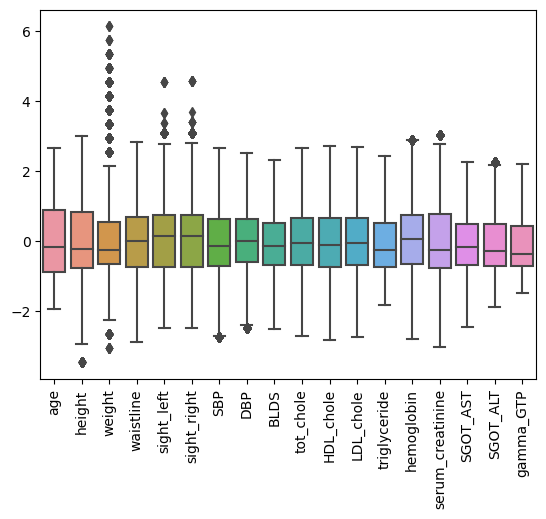

In [316]:
# boxplot of normalized data
sns.boxplot(data=df4_normalized)
plt.xticks(rotation=90)
plt.show()

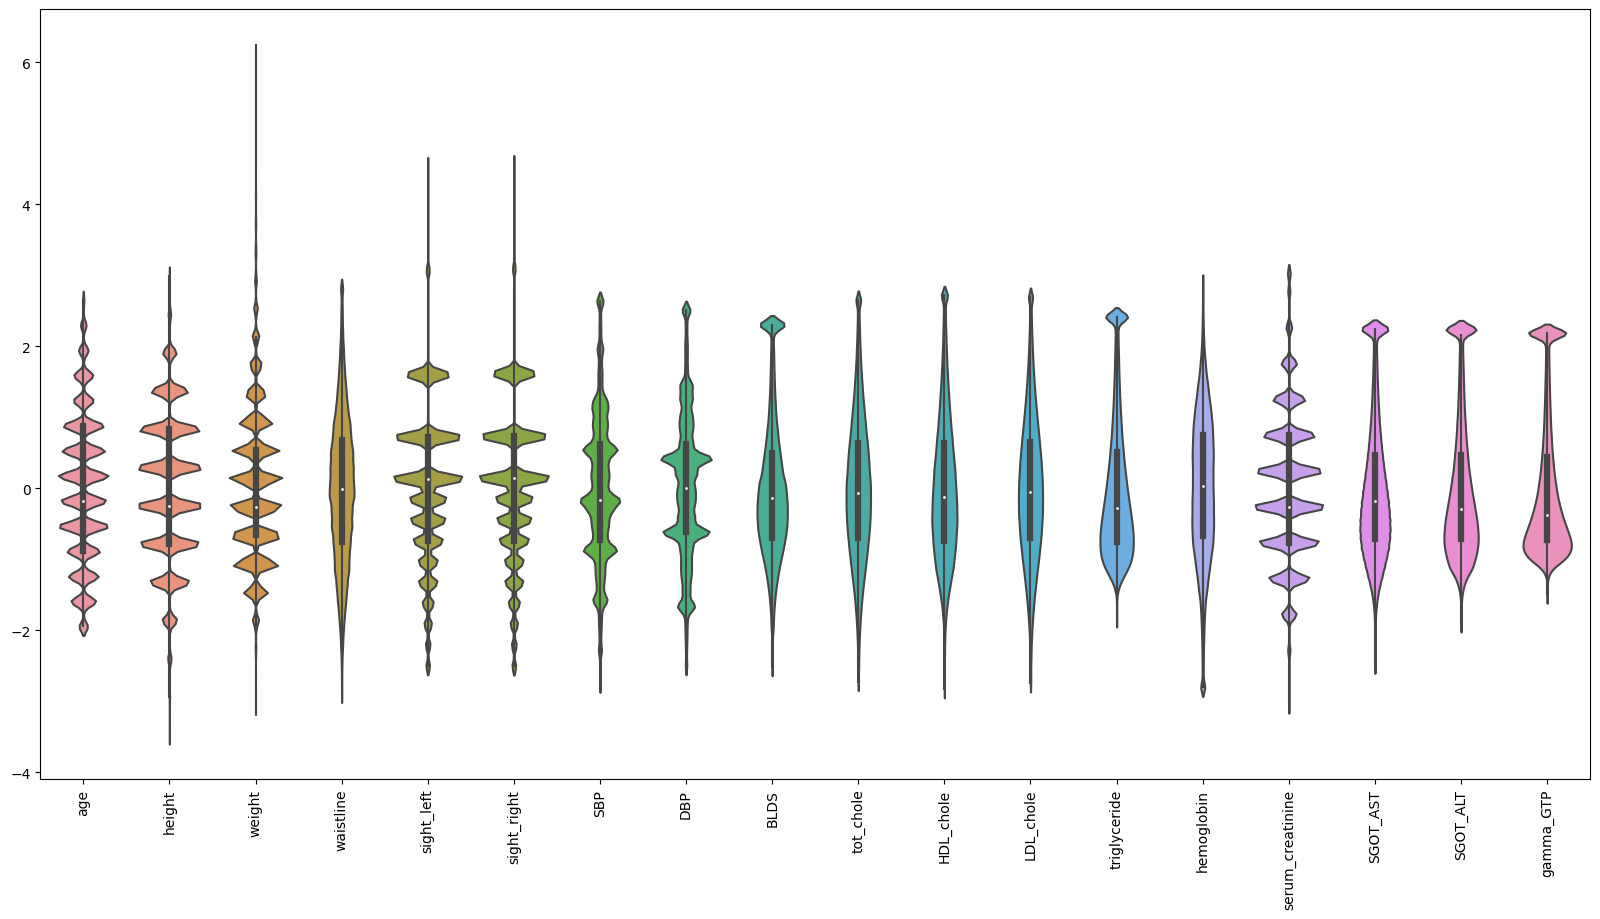

In [317]:
# violin plot of normalized data
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data=df4_normalized)
plt.xticks(rotation=90)
plt.show()

In [318]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()

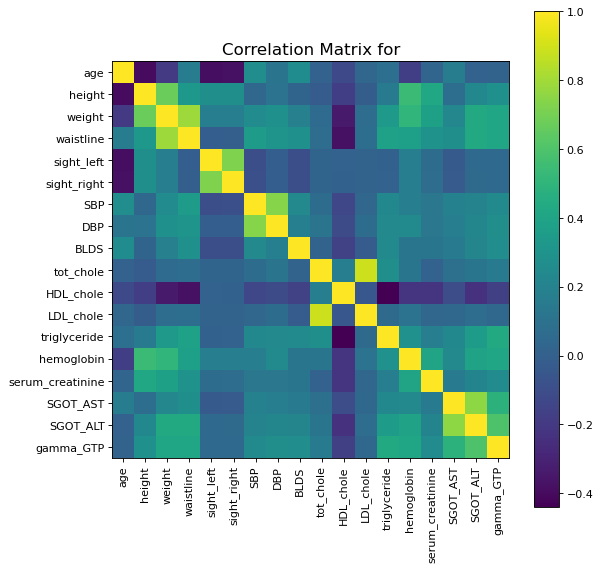

In [319]:
plotCorrelationMatrix(df4_normalized, 8)

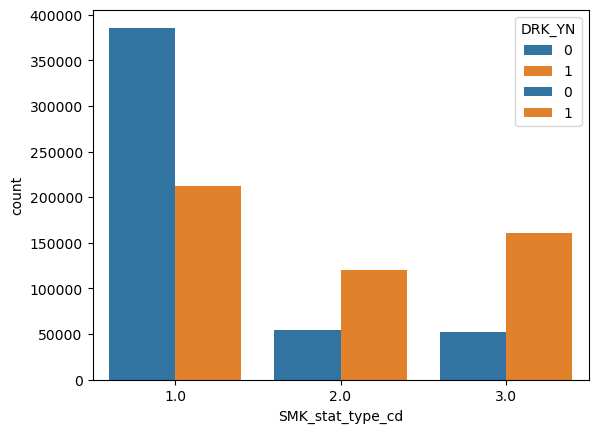

In [327]:
sns.countplot(data = df2, x='SMK_stat_type_cd', hue='DRK_YN')
plt.show()

In [332]:
# do svd
from scipy.linalg import svd
U, S, Vh = svd(df4_normalized, full_matrices=False)

# transpose Vh
V = Vh.T

Z = df4_normalized.dot(V)
Z.head()

0         1         2         3         4         5         6   \
0  2.085725 -1.229700 -0.107561  0.296272 -0.692595 -0.844845  0.040637   
1  2.334766 -1.398339  0.954495  1.048697 -0.458045 -0.823967  0.074673   
2  2.428856 -1.473944 -1.986153 -2.004926  0.839162  0.488788  0.110169   
3  2.759267 -1.475871 -0.045374  1.231167  1.441209 -1.588602 -0.848964   
4 -0.438153 -0.071611  0.200205  1.631044  0.800969  0.135834 -0.338961   

         7         8         9         10        11        12        13  \
0 -0.061957 -0.053881 -0.872511  0.579829  0.460020  0.860829  0.022859   
1 -0.970445 -0.246445 -0.938070 -0.375501 -0.275883 -0.183860  0.635779   
2  0.376342 -0.745298 -0.135507  0.523279  0.924052  0.246322  0.624005   
3  0.655563 -0.737569  0.175415  1.018970 -1.501831  0.056538 -0.627922   
4 -0.115946 -0.029235  0.048954  0.027379  0.187866 -0.517340  0.406976   

         14        15        16        17  
0  0.160858  0.550204  0.176800 -0.026165  
1 -0.165675  0.831974  0.289405 -0.016577  
2 -0.291418 -1.377681 -0.068540  0.005328  
3 -0.364073  0.380140 -0.009676  0.013050  
4 -0.296770 -0.156309  0.204493  0.001671

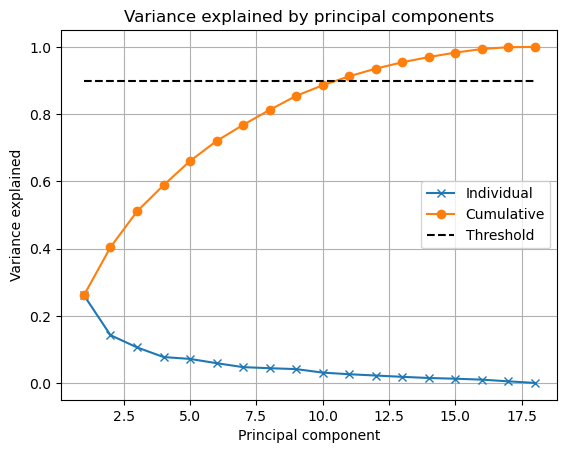

In [333]:
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

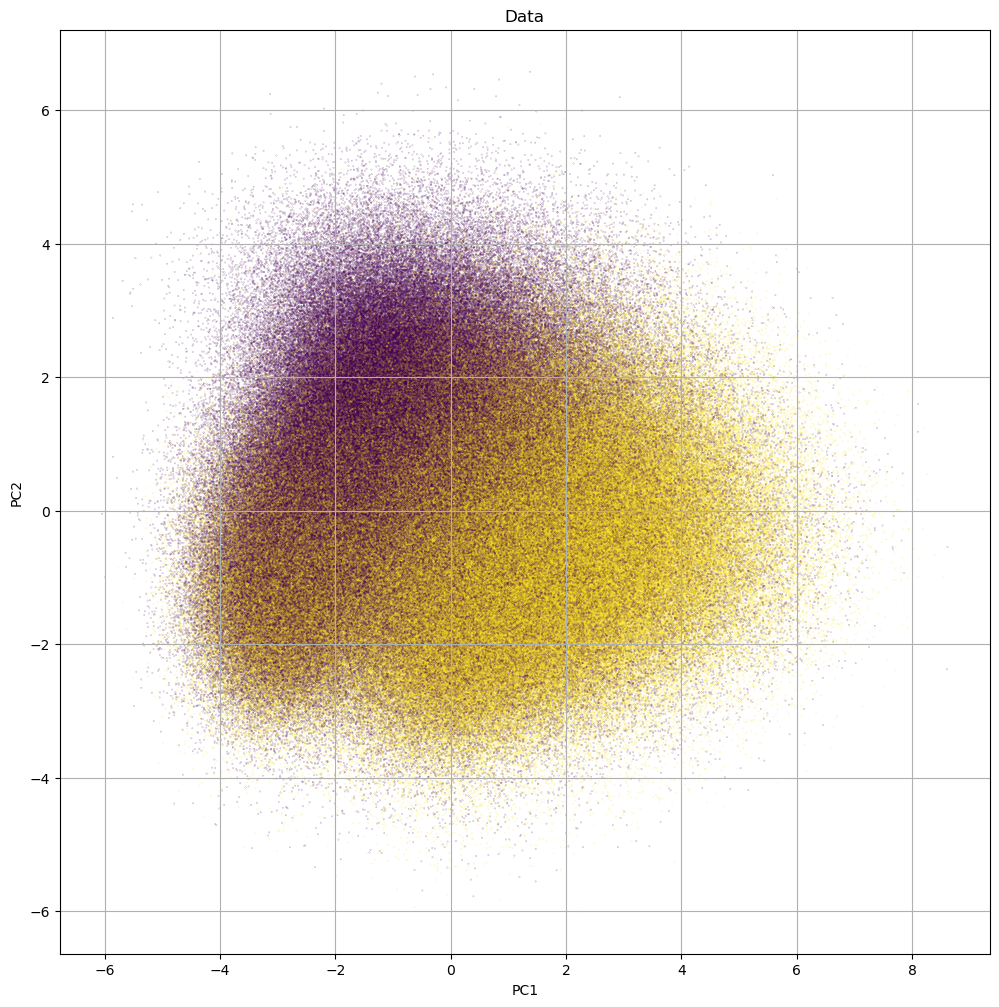

In [356]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(12,12))
plt.scatter(Z.iloc[:,0],Z.iloc[:,1],c=df2.DRK_YN, s=0.01, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

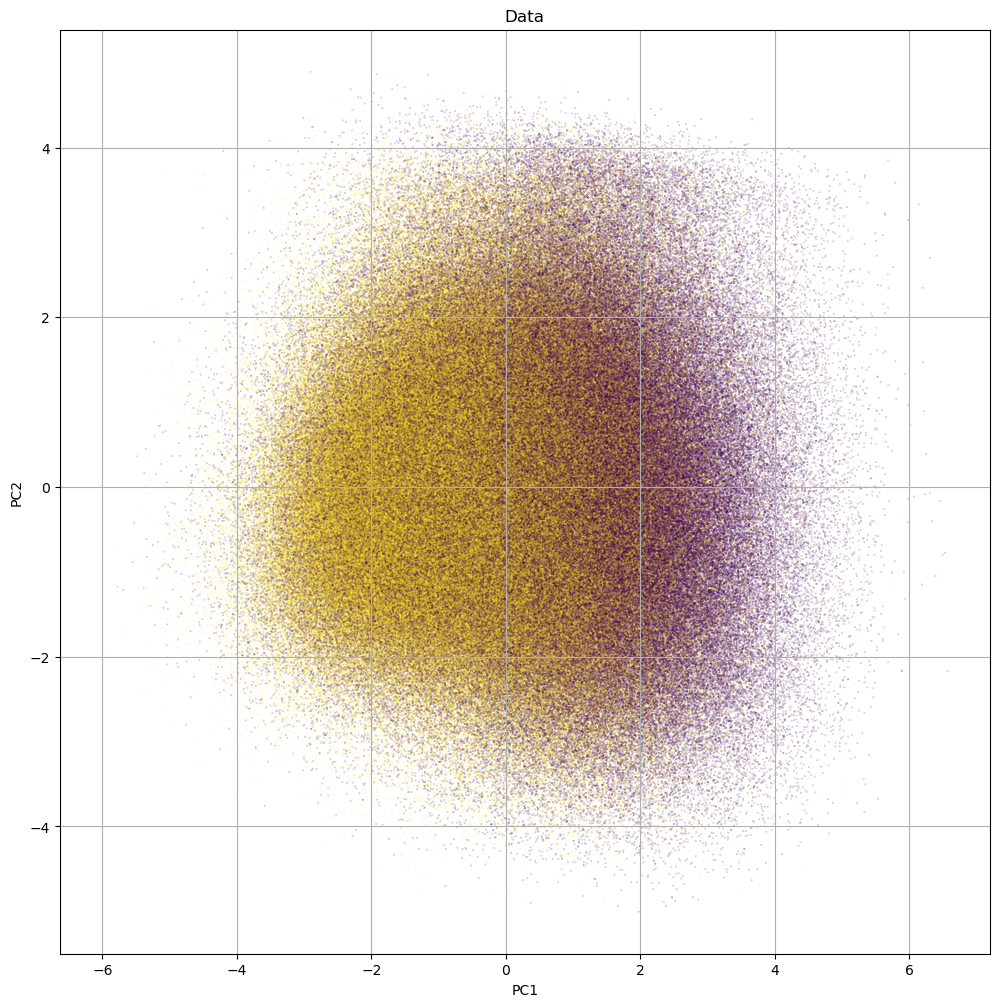

In [357]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(12,12))
plt.scatter(Z.iloc[:,1],Z.iloc[:,2],c=df2.DRK_YN, s=0.01, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

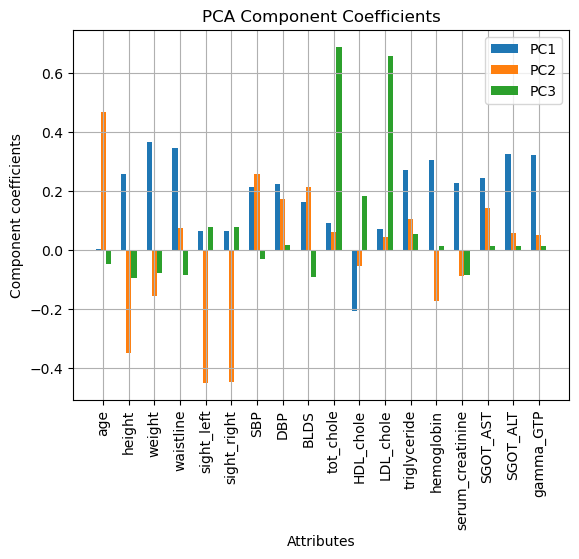

In [355]:
columns = df4_normalized.columns
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,df4_normalized.shape[1]+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, columns, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

# første 10000 datapunkter

In [368]:
# remove all but 50000 rows
df5 = df4_normalized.iloc[0:10000]
df5

age    height    weight  waistline  sight_left  sight_right  \
0     -0.886224  0.834195  0.934881   0.928954    0.137207     0.144818   
1     -1.239688  1.911956  1.334311   0.824012   -0.155893     0.733569   
2     -0.532760  0.295315  0.934881   1.033896    0.723408     1.616694   
3      0.174167  1.373076  1.334311   1.033896    1.602710     0.733569   
4      0.174167  0.295315 -0.263410  -0.120469    0.137207     0.733569   
...         ...       ...       ...        ...         ...          ...   
10058  1.941486 -1.321327  0.136020   1.978377   -1.621396    -1.621432   
10059 -1.946615 -0.782447 -1.461701  -1.673615    0.137207     0.733569   
10060 -0.886224  0.834195  0.136020   0.194358    1.602710     0.733569   
10061  1.234558  0.295315  0.136020  -0.120469   -1.035195    -1.032682   
10062  0.174167  0.834195  1.733741   1.453666    0.137207     0.733569   

            SBP       DBP      BLDS  tot_chole  HDL_chole  LDL_chole  \
0     -0.161481  0.421010  0.072648  -0.062223  -0.609370   0.389050   
1      0.546985  0.629597  0.568839   0.878428  -0.124225   1.038810   
2     -0.161481 -0.621925  0.001764  -1.594140  -1.094515  -1.146746   
3      1.609685  1.151064 -0.210890   0.152783   1.331210  -0.260710   
4      1.113759  0.629597  0.214417   0.099031   0.291613   0.123239   
...         ...       ...       ...        ...        ...        ...   
10058  1.255452  0.421010 -0.707081  -1.164129  -1.510354  -1.058143   
10059 -1.578415 -1.664860 -1.345041   0.260286   1.747049  -0.024434   
10060 -0.303175 -0.934805  0.994146  -0.411608   0.291613  -0.556056   
10061  0.901219  1.463944  0.143533   2.141588   0.430226   1.659035   
10062  0.759525  0.108129  0.639724   0.152783   1.816355  -0.733263   

       triglyceride  hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  \
0         -0.481655    1.846306          0.750591 -0.445813  0.971054   
1         -0.052695    1.006553          0.244984 -0.577068  1.055469   
2         -0.304154    1.006553          0.244984  2.244906  0.717807   
3         -0.274571    2.169288          1.256198  0.604224  0.886638   
4         -0.304154   -0.285375         -0.260622 -0.708322 -0.970505   
...             ...         ...               ...       ...       ...   
10058      1.056684   -1.771092          0.750591  0.210460 -0.632842   
10059     -1.088115   -0.866743          0.244984 -0.445813 -1.223751   
10060     -0.037903    1.006553         -0.260622 -0.052049  1.477547   
10061      1.322935    0.941956         -1.271836 -0.314559 -0.717258   
10062      0.346682    0.877360         -0.766229  2.244906  0.211314   

       gamma_GTP  
0       0.485460  
1      -0.174197  
2       1.906258  
3      -0.630882  
4      -0.275682  
...          ...  
10058  -0.986082  
10059  -1.036824  
10060  -0.021968  
10061  -0.478654  
10062   0.383974  

[10000 rows x 18 columns]

In [369]:
# do svd
from scipy.linalg import svd
U, S, Vh = svd(df5, full_matrices=False)

# transpose Vh
V = Vh.T

Z = df5.dot(V)
Z.head()

0         1         2         3         4         5         6   \
0  2.076006 -1.223705 -0.180982  0.344149 -0.661541 -0.865395  0.008306   
1  2.330319 -1.472273  0.888274  1.018486 -0.407474 -0.835767  0.032461   
2  2.432607 -1.337313 -2.096155 -2.036106  0.739351  0.427469  0.078996   
3  2.759981 -1.483498  0.009553  1.062956  1.534737 -1.610897 -1.003174   
4 -0.438840 -0.105943  0.270584  1.522982  0.955288  0.134866 -0.365697   

         7         8         9         10        11        12        13  \
0 -0.043833 -0.057072 -0.832711  0.534189 -0.516712  0.903164  0.005752   
1 -0.978405 -0.244800 -0.972900 -0.274590  0.230389 -0.212467  0.662758   
2  0.463317 -0.718493 -0.024931  0.390746 -0.988107  0.352263  0.563953   
3  0.566540 -0.667868  0.238018  1.147344  1.382178  0.059888 -0.616282   
4 -0.158938  0.013270  0.058383  0.015419 -0.220471 -0.479010  0.402023   

         14        15        16        17  
0  0.201004 -0.533284 -0.193940  0.025383  
1 -0.155830 -0.821885 -0.293463  0.021319  
2 -0.365305  1.361256  0.040992 -0.021890  
3 -0.330511 -0.392390  0.043772 -0.014592  
4 -0.344735  0.141699 -0.209862 -0.001897

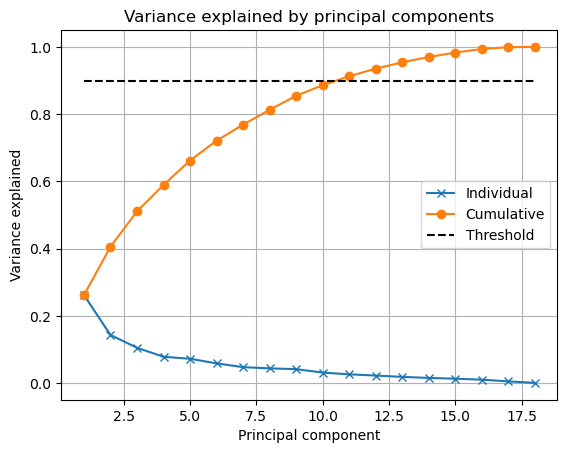

In [370]:
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

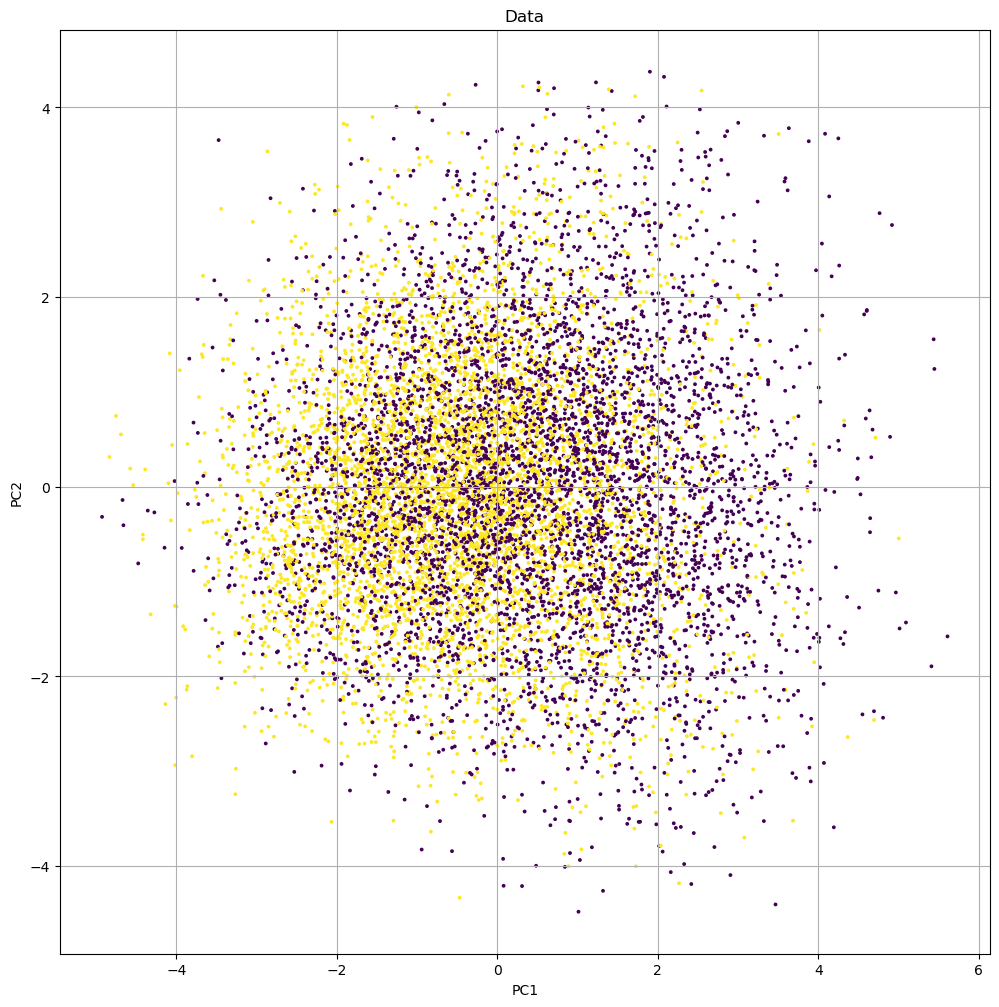

In [372]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(12,12))
plt.scatter(Z.iloc[:,1],Z.iloc[:,2],c=df2[0:10000].DRK_YN, s=3, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

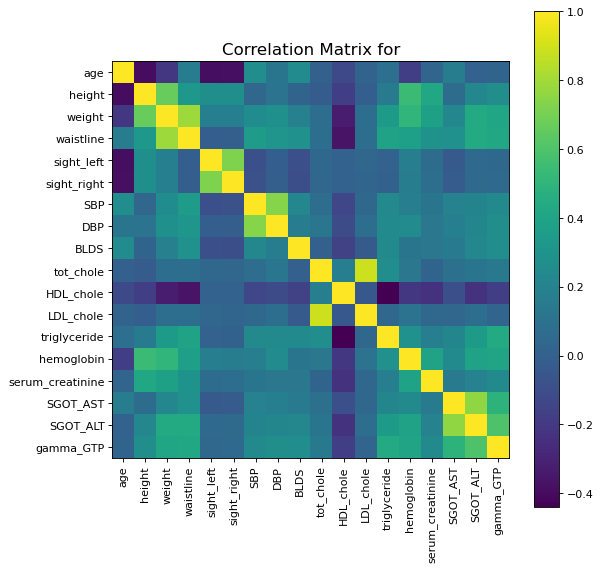

In [374]:
plotCorrelationMatrix(df5, 8)